In [ ]:
# we define a very simple vector x
x = [1, 8, 3, 9, 1, 2, 9, 4, 5, 4, 6,2]

In [2]:
m = 4  # how many subvectors we are going to have
D = len(x)  # Dimensionality of a given vector x

In [3]:
# D must be divisible by m (all subvectors must be of the equal size). Checking it
assert D % m == 0

In [ ]:
# calculating the length (size) of each subvector
D_ = int(D/m)
D_

3

In [8]:
# let's build a set of subvectors
u = [x[row:row+D_] for row in range(0, D, D_)]
u

[[1, 8, 3], [9, 1, 2], [9, 4, 5], [4, 6, 2]]

In [13]:
# we define k. The number of possible centroids that is going to be shared across our entire set of sub vectors
k = 2**5
k

# it means we'll have 32 (k) mappings in our codebook

32

In [ ]:
# k must be divisible by m!
assert k % m == 0
k_ = int(k/m)
k_  # we are going to have 8 centroids per subspace 

8

Our quantized subvector is one of these centroid sub vectors and each one of our reproduction values or those sub vectors the quantization vectors will be assigned a reproduction value id.</br>

We need to create those centroids. In real life we need to get them using a model

In [14]:
from random import randint

In [15]:
c = [] # list of reproduction values

In [16]:
for j in range(m):
    c_j = []  # here we will store eight different centroid vectors or reproduction values
    for i in range(k_):
      c_ji = [randint(0, 9) for _ in range(D_)]
      c_j.append(c_ji)
    c.append(c_j)  


We have 32 centroids in total, and 8 centroids per subvector space (subspace).
Each of these centroids will have three dimensions - aligned to our subvector dimensionality. Let's generate them.

In [17]:
c

[[[2, 0, 7],
  [8, 2, 9],
  [1, 6, 7],
  [7, 2, 9],
  [0, 4, 6],
  [9, 2, 1],
  [9, 1, 9],
  [1, 5, 6]],
 [[6, 2, 0],
  [9, 2, 0],
  [5, 3, 7],
  [1, 8, 2],
  [4, 1, 6],
  [5, 7, 3],
  [7, 6, 9],
  [8, 4, 1]],
 [[9, 7, 0],
  [8, 1, 7],
  [4, 1, 6],
  [6, 1, 2],
  [1, 5, 0],
  [8, 0, 4],
  [7, 1, 3],
  [9, 7, 9]],
 [[8, 9, 7],
  [7, 4, 3],
  [0, 2, 9],
  [5, 2, 8],
  [6, 8, 1],
  [0, 4, 1],
  [1, 1, 7],
  [8, 8, 6]]]

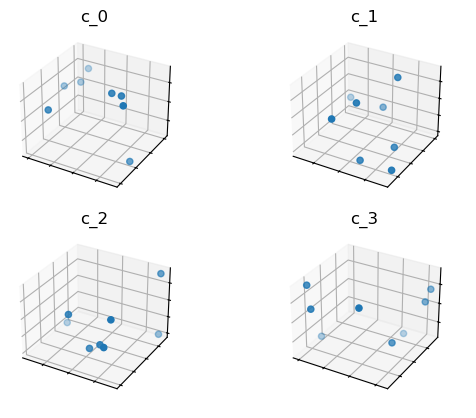

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()

for j in range(m):
    ax = fig.add_subplot(2, 2, j+1, projection='3d')
    # get centroid positions
    X = [c[j][i][0] for i in range(k_)]
    Y = [c[j][i][1] for i in range(k_)]
    Z = [c[j][i][2] for i in range(k_)]
    # plot
    ax.scatter(X, Y, Z)
    ax.set_title(f"c_{j}")
    # remove tick values (they're messy)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

These are the centroids for each of our subspaces, subvector u_0 will be mapped to a centroid within subspace c_0, u_1 to c_1, etc, etc.

We got reproduction values (all those centroids) and now we need to take our subvector and assign it to the nearest reproduction value or centroid. Let's go ahead and do this. First, we will define a function to find the nearest centroid using Euclidean distance.

In [21]:
def euclidean(v, u):
    distance = sum((x - y) ** 2 for x, y in zip(v, u)) ** .5
    return distance

def nearest(c_j, u_j):
    distance = 9e9
    for i in range(k_):
        new_dist = euclidean(c_j[i], u_j)
        if new_dist < distance:
            nearest_idx = i
            distance = new_dist
    return nearest_idx

And now we calculate the nearest centroids for each subspace.
Here we got our quantized vector!

In [22]:
ids = []
for j in range(m):
    i = nearest(c[j], u[j])
    ids.append(i)
ids

[7, 1, 1, 4]

Finally, we need a way to translate these IDs back into the centroid co-ordinates - well, we already have it - our codebook c, when it comes to comparing vectors we don't use the centroid IDs, we use the centroids themselves (our reproduction values).

In [23]:
q = []
for j in range(m):
    c_ji = c[j][ids[j]]
    q.extend(c_ji)

In [ ]:
q  # reconstructed vector

[1, 5, 6, 9, 2, 0, 8, 1, 7, 6, 8, 1]

We typical measure the error between our quantized vectors q and the originals x using mean squard error (MSE):

In [26]:
def mse(v, u):
    error = sum((x - y) ** 2 for x, y in zip(v, u)) / len(v)
    return error

In [27]:
mse(x, q)

3.8333333333333335